In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np


# <span style="color:orange">Handling data</span>
- Two different files ( electricity_consumption.csv and hourly_prices.csv)

In [3]:
#Read consumption data
df_consumption = pd.read_csv("electricity_consumption.csv", delimiter=";", decimal=",")
df_consumption=df_consumption[["Time","Consumption"]]
df_consumption.head()

,Time,Consumption
0,16.6.2021 0.00,3.42
1,16.6.2021 1.00,0.54
2,16.6.2021 2.00,0.40
3,16.6.2021 3.00,0.40
4,16.6.2021 4.00,0.39


In [4]:
#Function for time reformatting
def str2datetime(date_string_list,time_format):
    date_h=[0] * len(df_consumption)

    for i in range(len(date_string_list)):
        date_h[i]=datetime.datetime.strptime(date_string_list[i],time_format) #Time format d(day).m(month).Y(year) H(hour).M(Minutes)
    return date_h   

In [5]:
date_h=str2datetime(df_consumption["Time"],"%d.%m.%Y %H.%M") # Change time format text string datetime
df_consumption["DateTime"]=date_h
df_consumption=df_consumption[["DateTime","Consumption"]]# Select corret columns
df_consumption.head()

,DateTime,Consumption
0,2021-06-16 00:00:00,3.42
1,2021-06-16 01:00:00,0.54
2,2021-06-16 02:00:00,0.40
3,2021-06-16 03:00:00,0.40
4,2021-06-16 04:00:00,0.39


In [6]:
#read price data
df_price=pd.read_csv("hourly_prices.csv", delimiter=";", decimal=",")
df_price["DateTime"]=pd.to_datetime(df_price["DateTime"]) # Change time format text string datetime
df_price.head()

,DateTime,price
0,2021-06-16 00:00:00,6.91
1,2021-06-16 01:00:00,4.11
2,2021-06-16 02:00:00,5.00
3,2021-06-16 03:00:00,3.65
4,2021-06-16 04:00:00,3.68


In [7]:
#Merge two data files
df_electricity= pd.merge(df_consumption,df_price,on="DateTime",how="inner") 
len(df_electricity)
df_electricity["bill_eur"] =df_electricity["Consumption"] * df_electricity["price"] / 100
print(df_electricity)

per_hour=df_electricity["price"].mean()
total_consumption=df_electricity["Consumption"].sum()
total_price=df_electricity["bill_eur"].sum()

                DateTime  Consumption  price  bill_eur
0    2021-06-16 00:00:00         3.42   6.91  0.236322
1    2021-06-16 01:00:00         0.54   4.11  0.022194
2    2021-06-16 02:00:00         0.40   5.00  0.020000
3    2021-06-16 03:00:00         0.40   3.65  0.014600
4    2021-06-16 04:00:00         0.39   3.68  0.014352
...                  ...          ...    ...       ...
8732 2022-06-15 19:00:00         0.20  31.00  0.062000
8733 2022-06-15 20:00:00         1.24  27.17  0.336908
8734 2022-06-15 21:00:00         0.23  17.56  0.040388
8735 2022-06-15 22:00:00         0.48  12.39  0.059472
8736 2022-06-15 23:00:00         3.48  11.22  0.390456

[8737 rows x 4 columns]


# <span style="color:orange"> Calculated result printouts

- Total consumption over the time period
- Average hourly price over the time period
- Total electricity bill over the time period

In [8]:
print("Total consumption over the time period was ",total_consumption,"kWh")
print()
print("Average hourly price over the time period was",round(per_hour,2),"cents")
print()
print("Total electricity bill over the time period was",round(total_price,2),"€")

Total consumption over the time period was  13226.43 kWh

Average hourly price over the time period was 12.0 cents

Total electricity bill over the time period was 1693.4 €


# <span style="color:orange"> Vizualization </span>
### First three subplots are top of each other

- Plot1 is Consumption 
- Plot2 is Cost
- Plot3 is Price

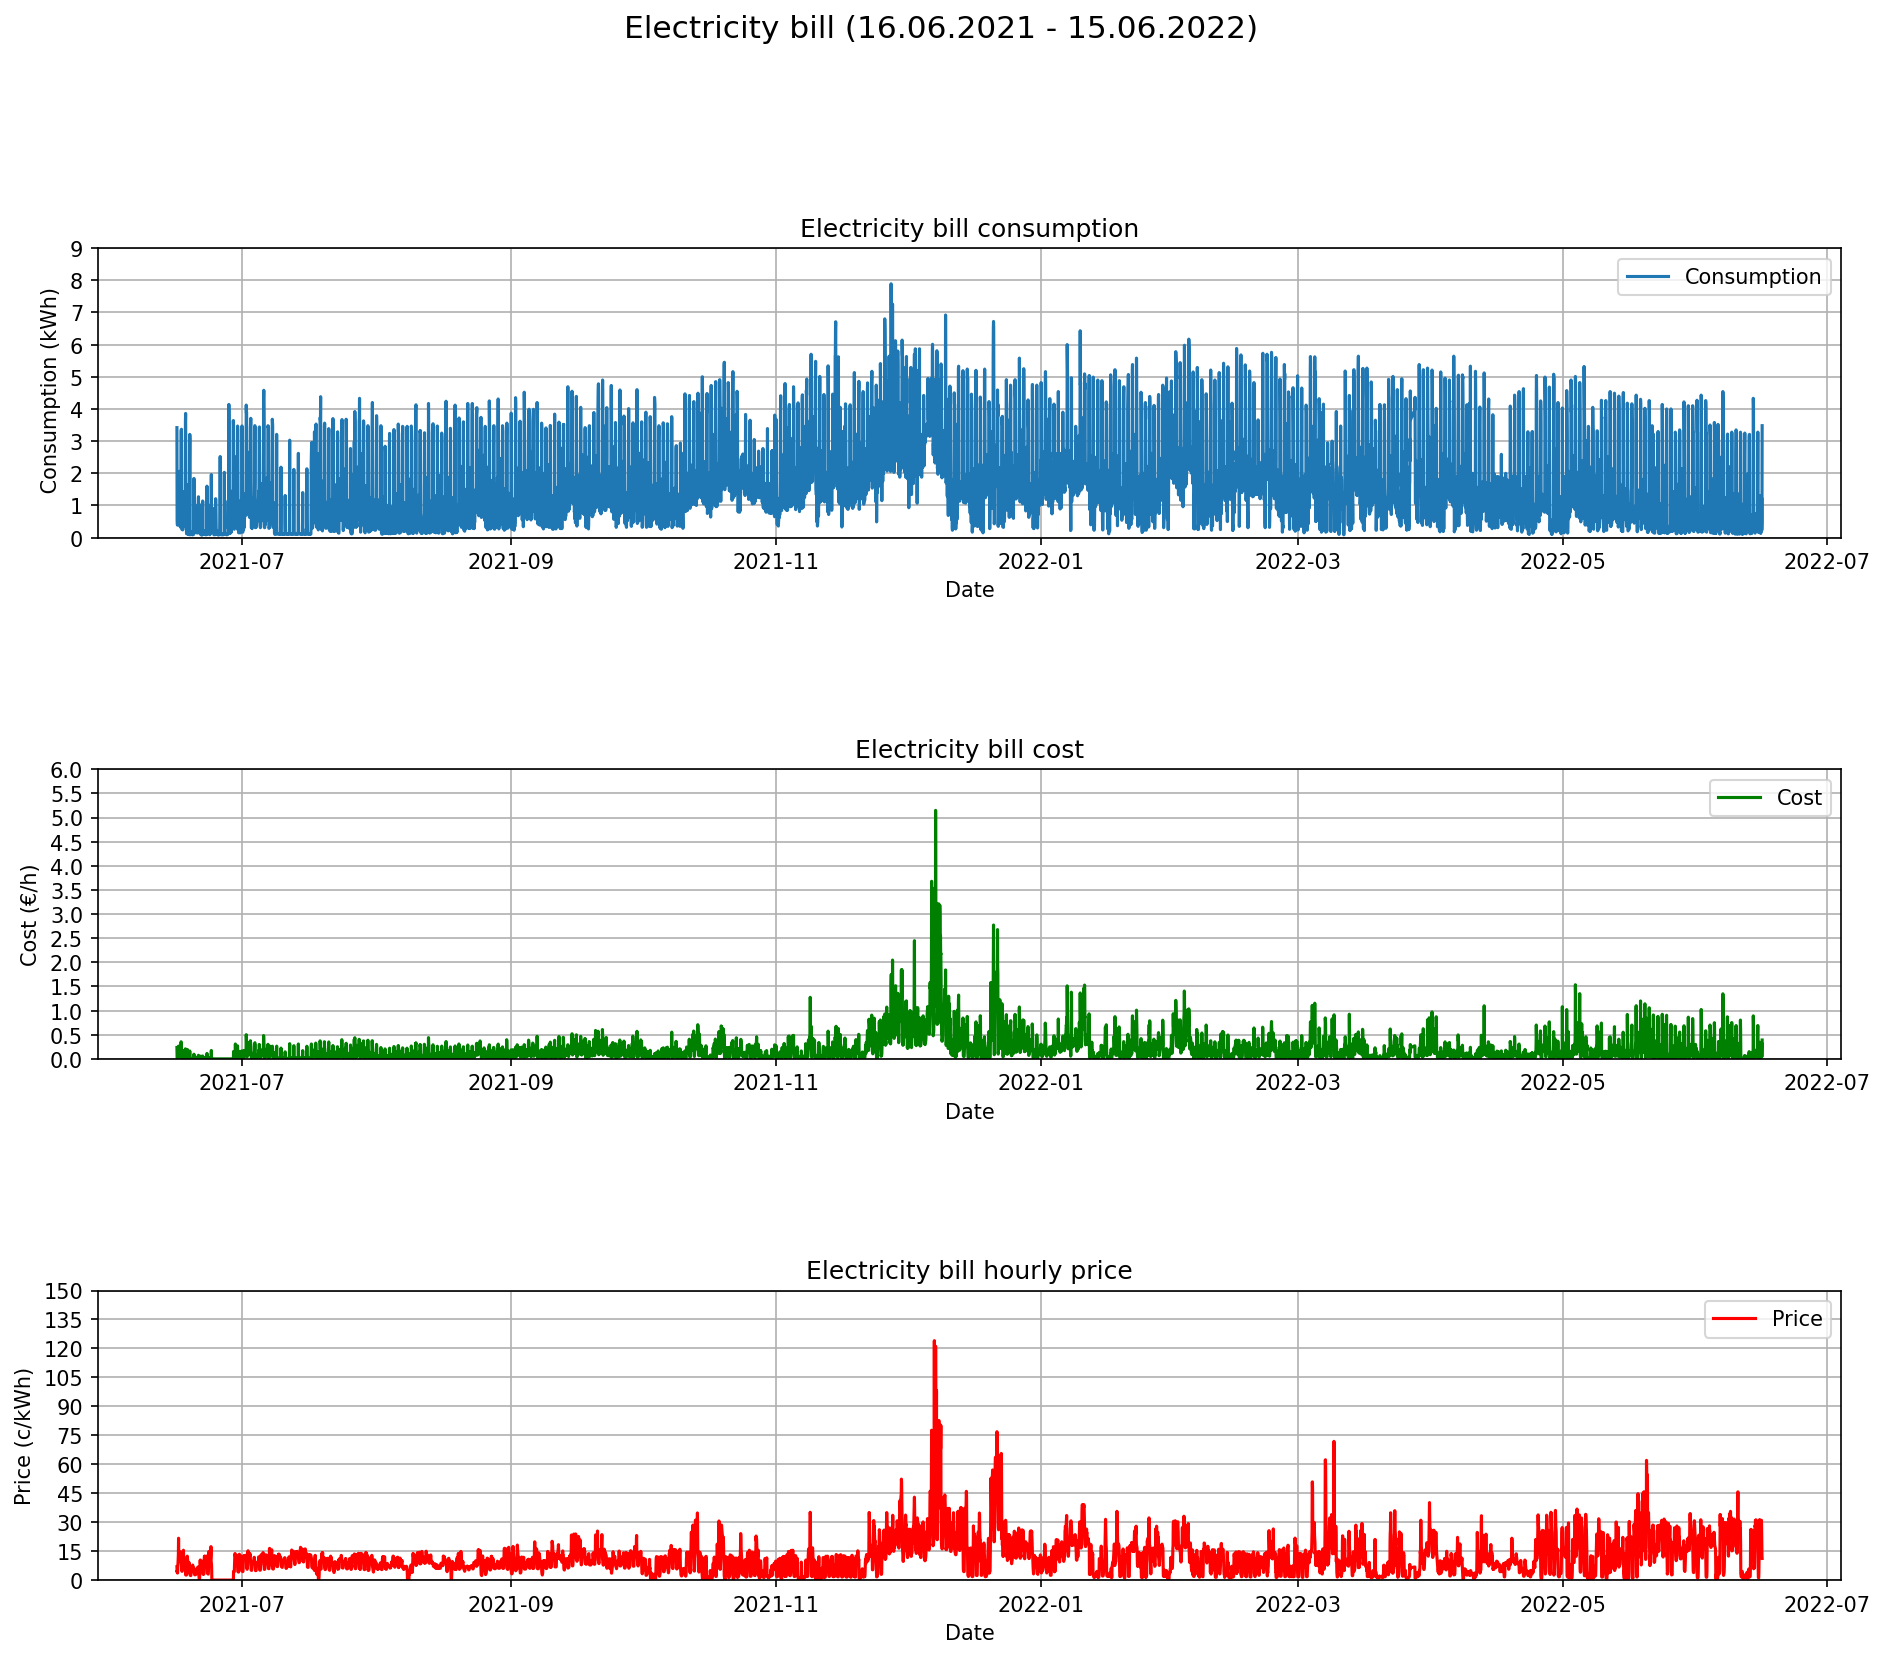

In [9]:
#Plot1
fig =plt.figure(figsize=(15,12),dpi=150)
fig.subplots_adjust(hspace=0.8, top=0.85)
fig.suptitle("Electricity bill (16.06.2021 - 15.06.2022)",fontsize=15)
x = df_electricity["DateTime"]
y = df_electricity["Consumption"]
plt.subplot(3, 1, 1)

plt.plot(x,y)
plt.title("Electricity bill consumption")
plt.xlabel("Date")
plt.ylabel(" Consumption (kWh)")
plt.legend(["Consumption"])
plt.ylim(0,9)
plt.yticks(np.arange(0,10,1))
plt.grid(True)

#Plot2

x = df_electricity["DateTime"]
y = df_electricity["bill_eur"]
plt.subplot(3, 1, 2)

plt.plot(x,y,color="green")
plt.title("Electricity bill cost")
plt.xlabel("Date")
plt.ylabel("Cost (€/h)")
plt.legend(["Cost"])
plt.ylim(0,5)
plt.yticks(np.arange(0,6.5,0.50))
plt.grid(True)


#Plot3

x = df_electricity["DateTime"]
y = df_electricity["price"]
plt.subplot(3, 1, 3)

plt.plot(x,y,color="red")
plt.title("Electricity bill hourly price")
plt.xlabel("Date")
plt.ylabel("Price (c/kWh)")
plt.legend(["Price"])
plt.ylim(0,150)
plt.yticks(np.arange(0,160,15))
plt.grid(True)


plt.show()

### Histrogram is also made with subplots, but they are side by side


- Hisrogram1 is hourly consumption
- Hisrogram2 is hourly bill
- Hisrogram3 is hourly price

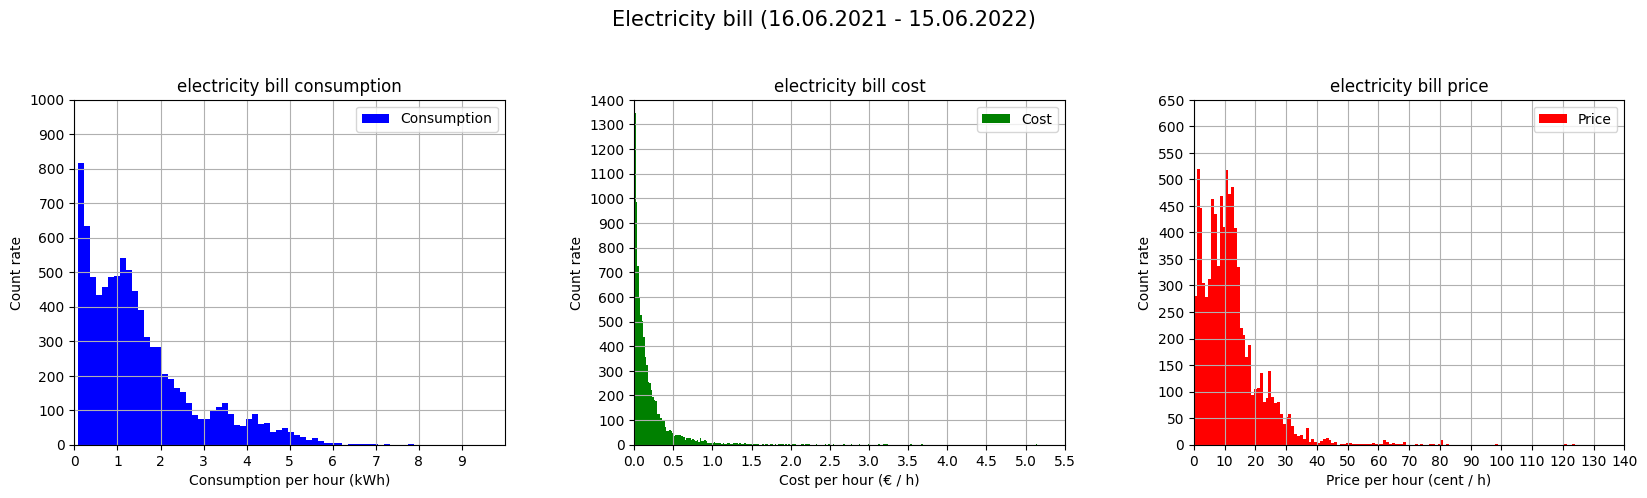

In [10]:

#Hisrogram1
fig=plt.figure(figsize=(20,5),dpi=100)
fig.subplots_adjust(wspace=0.3, top=0.80)
fig.suptitle("Electricity bill (16.06.2021 - 15.06.2022)",fontsize=15)
plt.subplot(1, 3, 1)
plt.hist(df_electricity["Consumption"],bins="auto",color="blue")
plt.title("electricity bill consumption")
plt.xlabel("Consumption per hour (kWh)")
plt.ylabel("Count rate")
plt.legend(["Consumption"])
plt.xlim(0,10)
plt.ylim(0,1000)
plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(0,1100,100))
plt.grid(True)

#Hisrogram2
plt.subplot(1, 3, 2)
plt.hist(df_electricity["bill_eur"],bins="auto",color="green")
plt.title("electricity bill cost")
plt.xlabel("Cost per hour (€ / h)")
plt.ylabel("Count rate")
plt.legend(["Cost"])
plt.xlim(0,5.5)
plt.ylim(0,1400)
plt.xticks(np.arange(0,6,0.5))
plt.yticks(np.arange(0,1500,100))
plt.grid(True)

#Hisrogram3
plt.subplot(1, 3, 3)
plt.hist(df_electricity["price"],bins="auto",color="red")
plt.title("electricity bill price")
plt.xlabel("Price per hour (cent / h)")
plt.ylabel("Count rate")
plt.legend(["Price"])
plt.xlim(0,140)
plt.ylim(0,650)
plt.xticks(np.arange(0,150,10))
plt.yticks(np.arange(0,660,50))
plt.grid(True)

plt.show()